In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
df= pd.read_csv("/Users/Liuna/Desktop/russian-troll-tweets-master/all_tweets.csv")

# name of columns
df.columns

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,7,8,9,10,12,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'retweet', 'account_category',
       'new_june_2018', 'alt_external_id', 'tweet_id', 'article_url',
       'tco1_step1', 'tco2_step1', 'tco3_step1'],
      dtype='object')

In [4]:
df=df.loc[df['language'] == "English"]

### Text processing

#### special characters, numbers, punctuations

In [19]:
df['neat_content'] = df['content'].str.replace("[^a-zA-Z#]", " ")

In [20]:
df['neat_content'].head()

0     We have a sitting Democrat US Senator on tria...
1    Marshawn Lynch arrives to game in anti Trump s...
2    Daughter of fallen Navy Sailor delivers powerf...
3    JUST IN  President Trump dedicates Presidents ...
4           RESPECTING our National Anthem  #StandF...
Name: neat_content, dtype: object

#### Removing Short Words

In [24]:
df = df[df['neat_content'].notnull()]

In [26]:
df['neat_content']= df['neat_content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [27]:
df['neat_content'].head()

0    have sitting Democrat Senator trial corruption...
1    Marshawn Lynch arrives game anti Trump shirt J...
2    Daughter fallen Navy Sailor delivers powerful ...
3    JUST President Trump dedicates Presidents golf...
4    RESPECTING National Anthem #StandForOurAnthem ...
Name: neat_content, dtype: object

#### lower case

In [28]:
df['neat_content']= df['neat_content'].str.lower()

In [29]:
df['neat_content'].head()

0    have sitting democrat senator trial corruption...
1    marshawn lynch arrives game anti trump shirt j...
2    daughter fallen navy sailor delivers powerful ...
3    just president trump dedicates presidents golf...
4    respecting national anthem #standforouranthem ...
Name: neat_content, dtype: object

#### removing stop words

In [30]:
from nltk.corpus import stopwords

In [32]:
stop = stopwords.words('english')

df['neat_content_p'] = df['neat_content'].apply(lambda x: ' '
                                                            .join([word for word in x.split() if word not in (stop)]))

In [33]:
df['neat_content'].head()

0    have sitting democrat senator trial corruption...
1    marshawn lynch arrives game anti trump shirt j...
2    daughter fallen navy sailor delivers powerful ...
3    just president trump dedicates presidents golf...
4    respecting national anthem #standforouranthem ...
Name: neat_content, dtype: object

#### tokenization

In [35]:
tokenized_content = df['neat_content'].apply(lambda x: x.split())
tokenized_content.head()

0    [have, sitting, democrat, senator, trial, corr...
1    [marshawn, lynch, arrives, game, anti, trump, ...
2    [daughter, fallen, navy, sailor, delivers, pow...
3    [just, president, trump, dedicates, presidents...
4    [respecting, national, anthem, #standforourant...
Name: neat_content, dtype: object

In [38]:
# separating publish date to : 1.date 2.time
df['date_tweet']=df['publish_date'].str.split().str[0]
df['time_tweet']=df['publish_date'].str.split().str[1]

In [39]:
df['count_freq_id_time']=df.groupby(['time_tweet','date_tweet',
                                     'external_author_id'])['external_author_id'].transform('count')
df_bot_maybe= df[df['count_freq_id_time']>1]

In [47]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_content = df_bot_maybe['neat_content'].apply(lambda x: x.split())
tokenized_content.head()

tokenized_content = tokenized_content.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_content.reset_index()

,index,neat_content
0,56,"[realdonaldtrump, obamacar, disast]"
1,57,"[realdonaldtrump, need, obamacar, soon, possib..."
2,135,"[http, tvokfkddl]"
3,136,"[sebgorka, bless, first, famili]"
4,184,"[rioter, loui, burn, american, flag, dure, the..."
5,185,"[thug, loui, burn, american, flag, dure, their..."
6,211,"[chavonze, also, paul, manafort, live, trump, ..."
7,212,"[confirm, that, trump, right, paul, manafort, ..."
8,222,"[video, show, destruct, caus, magnitud, earthq..."
9,223,"[video, destruct, caus, magnitud, earthquak, m..."


In [52]:
tokenized_content = tokenized_content.apply(' '.join)

In [53]:
tokenized_content.head()

56                       realdonaldtrump obamacar disast
57     realdonaldtrump need obamacar soon possibl bef...
135                                       http tvokfkddl
136                          sebgorka bless first famili
184    rioter loui burn american flag dure their prot...
Name: neat_content, dtype: object

In [57]:
df_bot_maybe['neat_content'] = df_bot_maybe['neat_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
                                                            

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
df_bot_maybe['neat_content'].head()

56                    realdonaldtrump obamacare disaster
57     realdonaldtrump need obamacare soon possible k...
135                                      https tvokfkddl
136                          sebgorka bless first family
184    rioters louis burn american flag protest guilt...
Name: neat_content, dtype: object

In [61]:
#result = re.sub(r"http\S+", "", subject)

df_bot_maybe['neat_content']= df_bot_maybe['neat_content'].apply(lambda x: re.sub(r"http\S+", "", x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
df_bot_maybe['neat_content']= df_bot_maybe['neat_content'].apply(lambda x: re.sub(r"https\S+", "", x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_bot_maybe['neat_content']= df_bot_maybe['neat_content'].str.replace("http","")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_bot_maybe['neat_content'].head()

56                    realdonaldtrump obamacare disaster
57     realdonaldtrump need obamacare soon possible k...
135                                            tvokfkddl
136                          sebgorka bless first family
184    rioters louis burn american flag protest guilt...
Name: neat_content, dtype: object

In [69]:
import collections
c = collections.Counter(" ".join(df_bot_maybe['neat_content']).split()).most_common(100)

In [70]:
print (c)

[('trump', 106775), ('people', 33750), ('like', 31782), ('obama', 30911), ('workout', 26017), ('breaking', 25786), ('video', 24552), ('hillary', 23774), ('black', 21402), ('white', 20546), ('time', 20002), ('president', 19457), ('know', 17399), ('make', 17332), ('america', 17291), ('good', 17143), ('need', 16987), ('clinton', 16825), ('want', 16454), ('would', 16108), ('love', 15919), ('news', 15602), ('media', 15247), ('look', 15056), ('realdonaldtrump', 14965), ('right', 14816), ('back', 14464), ('never', 14297), ('#news', 14065), ('today', 14057), ('police', 13765), ('says', 13395), ('watch', 13169), ('think', 13044), ('words', 12983), ('#maga', 12820), ('life', 12643), ('going', 12124), ('first', 12041), ('house', 11978), ('take', 11797), ('american', 11770), ('still', 11751), ('world', 11308), ('great', 11204), ('year', 10886), ('potus', 10638), ('best', 10587), ('really', 10506), ('stop', 10338), ('women', 10198), ('state', 10034), ('every', 9953), ('even', 9719), ('vote', 9623),

In [71]:
#### word cloud

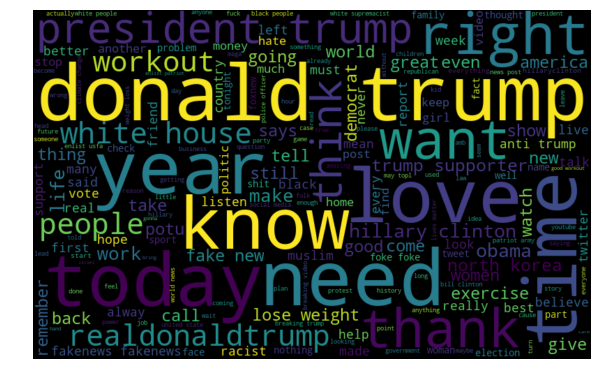

In [72]:
all_words = ' '.join([text for text in df_bot_maybe['neat_content']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [76]:
#'account_type', 'retweet', 'account_category'
df['account_type'].value_counts()

Right         704953
local         458012
Left          422141
Hashtager     236091
news          138581
Commercial    112580
Russian        20015
Koch           10759
?               6945
German          3567
Italian         1799
Arabic          1030
ZAPOROSHIA       172
Spanish           79
French            70
Ebola             70
Portuguese         2
Name: account_type, dtype: int64

In [77]:
df['account_category'].value_counts()

RightTroll      704953
NewsFeed        596593
LeftTroll       422141
HashtagGamer    236091
Commercial      112580
NonEnglish       26562
Fearmonger       11001
Unknown           6945
Name: account_category, dtype: int64

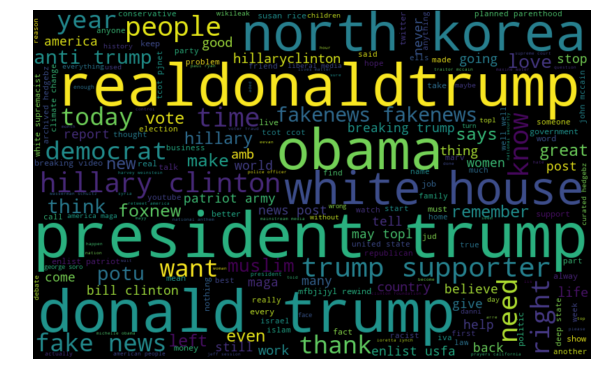

In [80]:
right_troll = ' '.join([text for text in df_bot_maybe['neat_content'] [df_bot_maybe['account_category']=="RightTroll"]]) 

wordcloud_r = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(right_troll)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_r, interpolation="bilinear")
plt.axis('off')
plt.show()


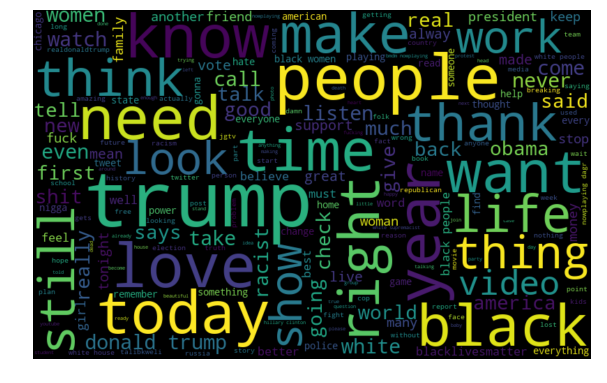

In [81]:
left_troll = ' '.join([text for text in df_bot_maybe['neat_content'] [df_bot_maybe['account_category']=="LeftTroll"]]) 

wordcloud_l = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(left_troll)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_l, interpolation="bilinear")
plt.axis('off')
plt.show()


#### extracting hashtags

In [82]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [83]:
# extracting hashtags from right trolls

HT_right = hashtag_extract(df_bot_maybe['neat_content'] [df_bot_maybe['account_category']=="RightTroll"])
 

# extracting hashtags from left trolls
HT_left = hashtag_extract(df_bot_maybe['neat_content'] [df_bot_maybe['account_category']=="LeftTroll"])

# unnesting list
HT_right = sum(HT_right,[])
HT_left = sum(HT_left,[])

#### Distribution of top 10 hashtags for right trolls

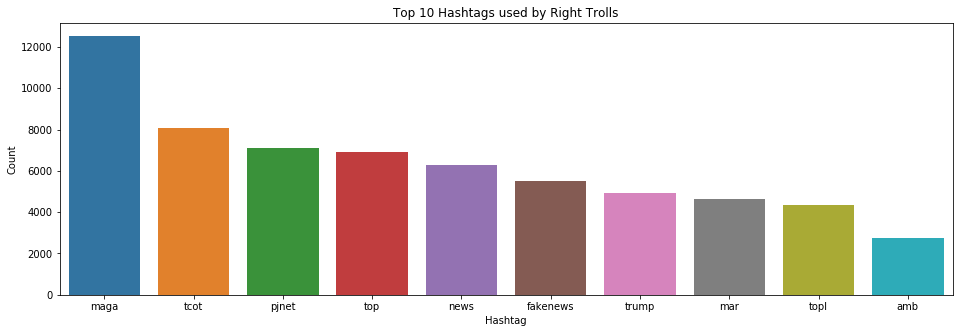

In [84]:
freq_r = nltk.FreqDist(HT_right)
df_r = pd.DataFrame({'Hashtag': list(freq_r.keys()),
                  'Count': list(freq_r .values())})

# selecting top 10 most frequent hashtags     
df_r = df_r.nlargest(columns="Count", n = 10)    # assigning 10 most frequent hashtags
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df_r, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Top 10 Hashtags used by Right Trolls')
plt.show()

#### Distribution of top 10 hashtags for left trolls

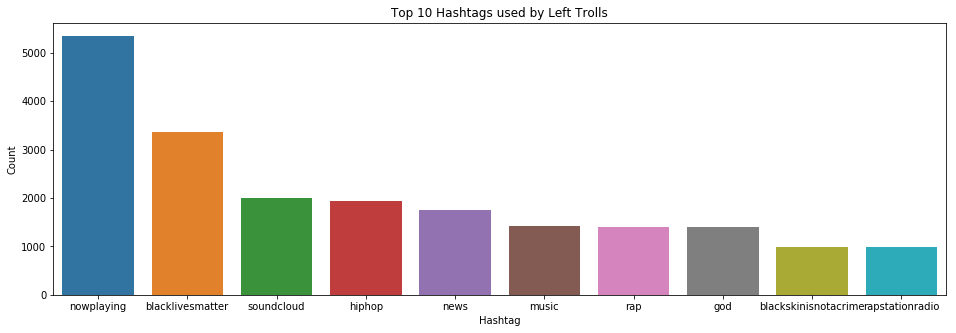

In [85]:
freq_l = nltk.FreqDist(HT_left)
df_l = pd.DataFrame({'Hashtag': list(freq_l.keys()),
                  'Count': list(freq_l.values())})

# selecting top 10 most frequent hashtags     
df_l = df_l.nlargest(columns="Count", n = 10)    # assigning 10 most frequent hashtags
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df_l, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Top 10 Hashtags used by Left Trolls')
plt.show()

In [89]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [90]:
analyser = SentimentIntensityAnalyzer()

In [101]:
#tokenized_content = tokenized_content.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

def sentiment_extract(x):
    sentiment = []
    # Loop over the words in the tweet
    for i in x:
        st = analyser.polarity_scores(i)
        for j in sorted(st):
             sentiment.extend([j,st[j]])
    return sentiment

In [102]:
sentiment_right = sentiment_extract(df_bot_maybe['neat_content'] [df_bot_maybe['account_category']=="RightTroll"])

In [103]:
sentiment_left = sentiment_extract(df_bot_maybe['neat_content'] [df_bot_maybe['account_category']=="LeftTroll"])

In [104]:
sentiment_right

['compound',
 -0.6249,
 'neg',
 0.672,
 'neu',
 0.328,
 'pos',
 0.0,
 'compound',
 -0.5423,
 'neg',
 0.368,
 'neu',
 0.632,
 'pos',
 0.0,
 'compound',
 0.0,
 'neg',
 0.0,
 'neu',
 1.0,
 'pos',
 0.0,
 'compound',
 0.4215,
 'neg',
 0.0,
 'neu',
 0.517,
 'pos',
 0.483,
 'compound',
 -0.765,
 'neg',
 0.436,
 'neu',
 0.479,
 'pos',
 0.085,
 'compound',
 -0.765,
 'neg',
 0.436,
 'neu',
 0.479,
 'pos',
 0.085,
 'compound',
 0.0,
 'neg',
 0.0,
 'neu',
 1.0,
 'pos',
 0.0,
 'compound',
 0.0,
 'neg',
 0.0,
 'neu',
 1.0,
 'pos',
 0.0,
 'compound',
 -0.5719,
 'neg',
 0.316,
 'neu',
 0.684,
 'pos',
 0.0,
 'compound',
 -0.5719,
 'neg',
 0.316,
 'neu',
 0.684,
 'pos',
 0.0,
 'compound',
 -0.7003,
 'neg',
 0.453,
 'neu',
 0.547,
 'pos',
 0.0,
 'compound',
 -0.7003,
 'neg',
 0.453,
 'neu',
 0.547,
 'pos',
 0.0,
 'compound',
 0.0,
 'neg',
 0.0,
 'neu',
 1.0,
 'pos',
 0.0,
 'compound',
 0.0,
 'neg',
 0.0,
 'neu',
 1.0,
 'pos',
 0.0,
 'compound',
 0.8271,
 'neg',
 0.0,
 'neu',
 0.408,
 'pos',
 0.592,
 'com